<a href="https://colab.research.google.com/github/Franklinyeruan/CHEM101.6/blob/main/Franklin_Final_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello there! This is the code for Franklin's Final Project in Chem 96: Computational Chemistry

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Load Colvar 
infile = '/content/drive/MyDrive/School /CHEM 96: Computational Chem /Project 6/Project5_Student_TestExercise-1/run_A/COLVAR'
phi, psi=np.loadtxt(infile, unpack=True, usecols=(1,2), skiprows=7)
dataA = pd.DataFrame(np.loadtxt(infile), columns = ['Time','phi','psi'])

# Discretize the data 

# cos_phi=np.cos(phi)
# sin_phi=np.sin(phi)
# cos_psi=np.cos(psi)
# sin_psi=np.sin(psi)

# # Spatially discretized data
# idx_sin_phi=np.digitize(sin_phi, bins)
# idx_sin_psi=np.digitize(sin_psi, bins)

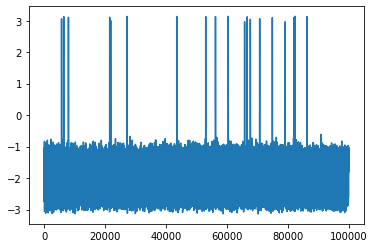

In [ ]:
# Survey Phi angles over time 
plt.plot(phi)

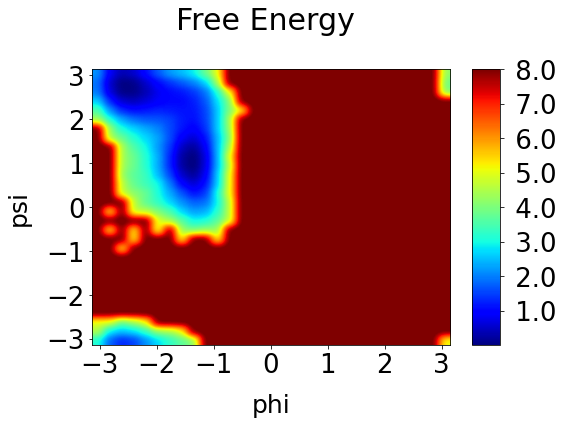

<Figure size 432x288 with 0 Axes>

In [ ]:
#Lets Plot the Free Energy Surfaces of Each Simulation
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges


dG,xedges,yedges=free_energy(dataA["psi"],dataA["phi"], 300, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.title("Free Energy \n", size=30)
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

#Machine Learning Model to predict Phi 

In [ ]:
# Phi 
phi_train = phi[0:1000]
phi_test = phi[1001:2000]

In [ ]:
# Generate supervision
look_back = 15

train_generator_phi = TimeseriesGenerator(phi_train, phi_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(phi_test, phi_test, length=look_back, batch_size=1)

Machine Learning Model 

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 100
model.fit_generator(train_generator_phi, epochs=num_epochs, verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



50/50 [==============================] - 1s 5ms/step - loss: 4.9985
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 3.9818
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 2.3088
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4126
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.3585
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2586
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1918
Epoch 8/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1630
Epoch 9/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1484
Epoch 10/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1453
Epoch 11/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1340
Epoch 12/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1280
Epoch 13/100
50/50 [=============================

In [ ]:
# Create Time Axis 
date_train = np.asarray(range(0,1000))
date_test = np.asarray(range(1001,2000))

In [ ]:
# Let's plot
import plotly.graph_objects as go
prediction = model.predict(test_generator)
phi_pred = prediction
close_train = phi_train.reshape((-1))
close_test = phi_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Phi Angles",
    xaxis = {'title' : "Frame"},
    yaxis = {'title' : "Radians"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

# Predict Psi Angles 


In [ ]:
# Psi 
psi_train = psi[0:1000]
psi_test = psi[1001:2000]



In [ ]:
# Generate supervision
look_back = 15
train_generator_psi = TimeseriesGenerator(psi_train, psi_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(psi_test, psi_test, length=look_back, batch_size=1)

# Code was lost in last Google Colab Crash. But stack phi and psi for the training data. Test Data Stays the same 

Machine Learning Model 

https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

Multivariate

In [ ]:
# Colab Crashed and Data was lost, and thus I cannot rerun the model exactly. The code should look...
# like this - as the model architecture was rebuilt post-crash. However, I cannot debug it without the...
# correct setup, which was lost. 

from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)
model.add(Bidirectional(LSTM(20, 
                             return_sequences=True), 
                        input_shape=(look_back, 
                                     1))
model.add(Bidirectional(LSTM(20, 
                             return_sequences=False), 
                        input_shape=(look_back, 
                                     1))
model.add(Dense(1))
model.compile(optimizer='adam', 
              loss='mse')

num_epochs = 100
model.fit_generator(train_generator, 
                    epochs=num_epochs, 
                    verbose=1)

In [ ]:
date_train = np.asarray(range(0,1000))
date_test = np.asarray(range(1001,2000))

In [ ]:
import plotly.graph_objects as go
prediction = model.predict(test_generator)
psi_pred = prediction

close_train = psi_train.reshape((-1))
close_test = psi_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Psi Angles",
    xaxis = {'title' : "Frame"},
    yaxis = {'title' : "Radians"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

# Free Energy Analysis 

1000 frame train 

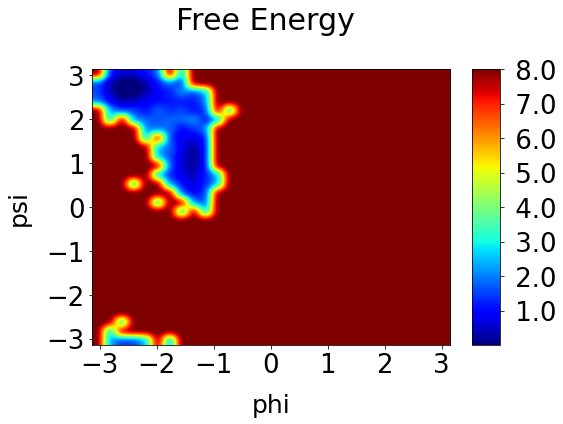

<Figure size 432x288 with 0 Axes>

In [ ]:
#Lets Plot the Free Energy Surfaces of Each Simulation
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges



df = pd.DataFrame({'psi': list(psi_train), 'phi': list(phi_train)})



dG,xedges,yedges=free_energy(df["psi"],df["phi"], 300, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.title("Free Energy \n", size=30)
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

1000 frames PRED

Free Energy Plots for Multivariate and Multivariate Stacked LSTM as lost because of Crash, but it would be recreated in analogous fashion. 

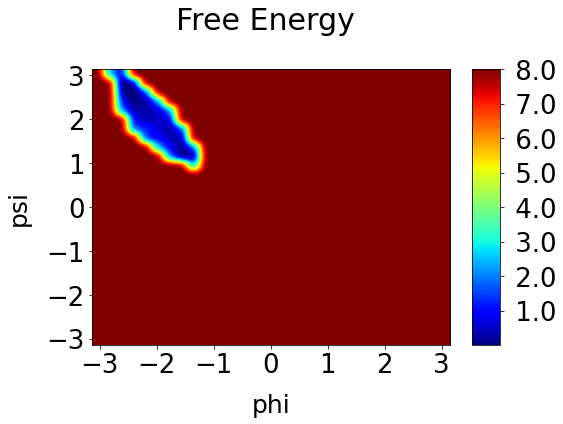

<Figure size 432x288 with 0 Axes>

In [ ]:
#Lets Plot the Free Energy Surfaces of Each Simulation
def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], normed=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges



df = pd.DataFrame({'psi': list(psi_pred), 'phi': list(phi_pred)})



dG,xedges,yedges=free_energy(df["psi"],df["phi"], 300, -3.14, 3.14, -3.14, 3.14)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-3.14,3.14)
plt.ylim(-3.14,3.14)

cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.title("Free Energy \n", size=30)
plt.ylabel("psi", size=25, labelpad=15)
plt.xlabel("phi", size=25, labelpad=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(size='26')
plt.yticks(size='26')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
plt.clf()

# RMSD AND RG of CHIGNOLIN

In [ ]:
rmsd_path = '/content/drive/MyDrive/School /CHEM 96: Computational Chem /Final Project/CLN025_data/CLN025.RMSD.dat'
rg_path = '/content/drive/MyDrive/School /CHEM 96: Computational Chem /Final Project/CLN025_data/CLN025.Rg.dat'

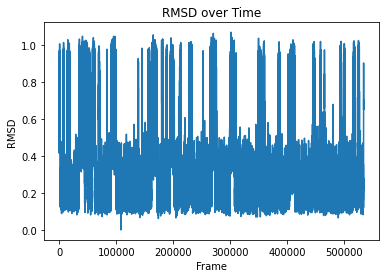

In [ ]:
# Survey of RMSD over time
rmsd = np.loadtxt(rmsd_path, unpack=True)

plt.title("RMSD over Time")
plt.ylabel("RMSD")
plt.xlabel("Frame")
plt.plot(rmsd)

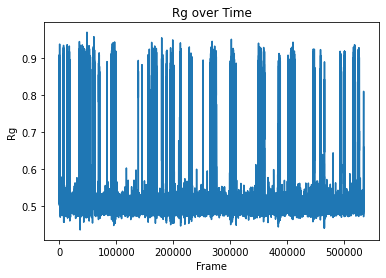

In [ ]:
# Survey of RG over time 
rg = np.loadtxt(rg_path, unpack=True)

plt.title("Rg over Time")
plt.ylabel("Rg")
plt.xlabel("Frame")
plt.plot(rg)

#RMSD

In [ ]:
# Rmsd
rmsd_train = rmsd[0:10000]
rmsd_test = rmsd[10001:20000]

# Generate supervision
look_back = 15

train_generator_rmsd = TimeseriesGenerator(rmsd_train, rmsd_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(rmsd_test, rmsd_test, length=look_back, batch_size=1)

# Model Train
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 40
model.fit_generator(train_generator_rmsd, epochs=num_epochs, verbose=1)


# Graph Everything
date_train = np.asarray(range(0,10000))
date_test = np.asarray(range(10001,20000))

import plotly.graph_objects as go
prediction = model.predict(test_generator)
rmsd_pred = prediction
close_train = rmsd_train.reshape((-1))
close_test = rmsd_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "RMSD",
    xaxis = {'title' : "Frame"},
    yaxis = {'title' : "RMSD"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



500/500 [==============================] - 4s 6ms/step - loss: 0.0347
Epoch 2/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0058
Epoch 3/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0053
Epoch 4/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0051
Epoch 5/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0047
Epoch 6/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0044
Epoch 7/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0042
Epoch 8/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0040
Epoch 9/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0038
Epoch 10/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0036
Epoch 11/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0035
Epoch 12/100
500/500 [==============================] - 3s 5ms/step - loss: 0.0034
Epoch 13/100
500/500 [===

In [ ]:
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

# RG

In [ ]:
# Rg
rg_train = rg[0:10000]
rg_test = rg[10001:20000]

# Generate supervision
look_back = 15

train_generator_rg = TimeseriesGenerator(rg_train, rg_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(rg_test, rg_test, length=look_back, batch_size=1)

# Model Train
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 35
model.fit_generator(train_generator_rg, epochs=num_epochs, verbose=1)


# Graph Everything
date_train = np.asarray(range(0,10000))
date_test = np.asarray(range(10001,20000))

import plotly.graph_objects as go
prediction = model.predict(test_generator)
rg_pred = prediction
close_train = rg_train.reshape((-1))
close_test = rg_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Rg",
    xaxis = {'title' : "Frame"},
    yaxis = {'title' : "Rg"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



500/500 [==============================] - 5s 7ms/step - loss: 0.0236
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0015
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 4/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0014
Epoch 6/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0013
Epoch 7/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0013
Epoch 8/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0013
Epoch 9/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0013
Epoch 10/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0013
Epoch 11/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0012
Epoch 12/100
500/500 [==============================] - 3s 6ms/step - loss: 0.0012
Epoch 13/100
500/500 [===

In [ ]:
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()